<a href="https://colab.research.google.com/github/jktb/DEEP--Tech-123/blob/main/DTTE_Colab_tutorial_15_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines



In [2]:
#Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import pandas
import numpy as np

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


The topic of classifier in today's lab, SVMs make for really good linear separators. Let us look at an example which has linearly separable data:

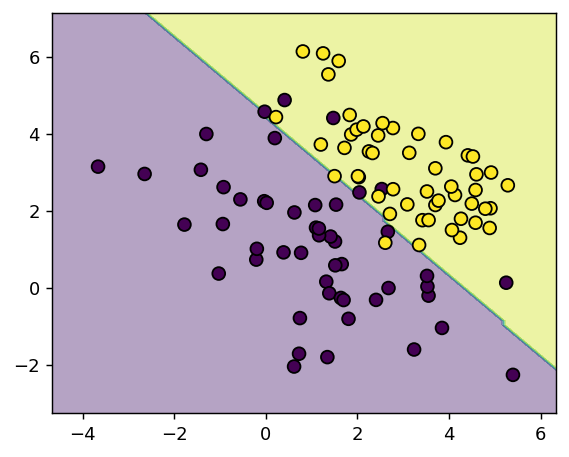

In [3]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)

  plt.show()

boundaryExp()

## Intuitive introduction to SVMs:

![SVM](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

SVMs are an iterative approach of trying to find the optimal hyperplane that divides the multidimentional space into different classes present in the dataset.


**Hyperplanes:** These are the decision planes that separate the objects of classes that we are trying to classify.

**Support Vectors** : Support vectors are the points from dataset that are closest to the hyperplane that divides the dataset.

**Margin**:  The gap between the closest support vectors from the different class along the direction perpendicular to the hyperplane. Simply put, it is the sum of perpendicular distance of the support vector of each class to the hyperplane.

---

Let us try to fall back to the well known dataset and see how SVMs perform on the iris dataset

In [4]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of the decision tree on the test set: 

0.921


The confusion matrix is : 


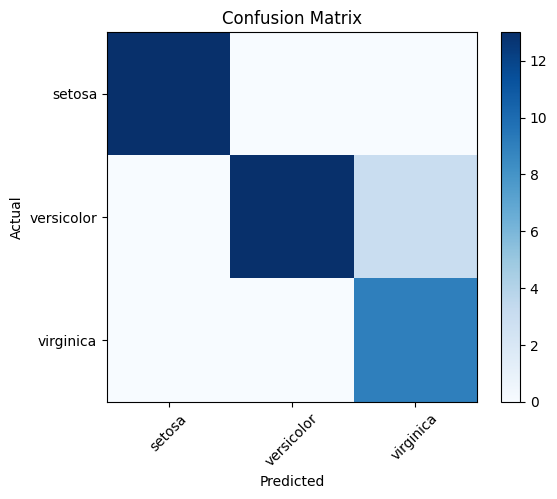

In [5]:
clf = svm.LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))
class_names = iris["target_names"]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_names = iris["target_names"]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
print("The confusion matrix is : ")
plt.show()


Now lets again try to see how does SVM perform when we give it just two of the features from the dataset

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


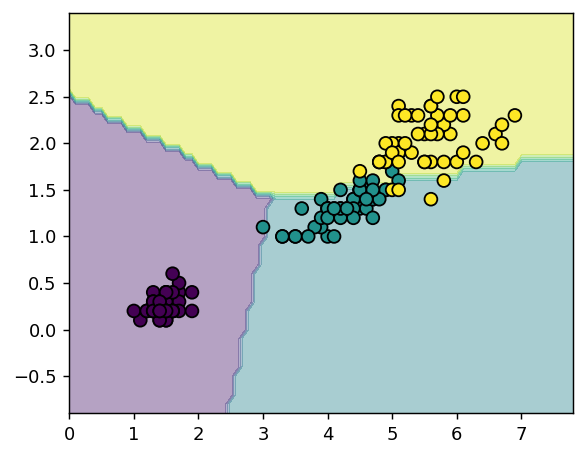

In [6]:
clf = svm.LinearSVC()
pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3], clf)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


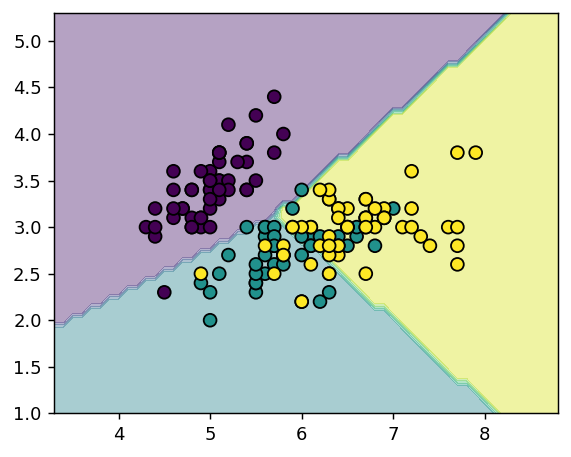

In [7]:
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

#### Alas! We see that SVMs are not able to classify the data in the above experiment because the data is not **linearly separable**

Thankfully, We have a neat trick up our sleeves that will help us to solve these problems. Let us take a look at a typical example that is used to illustrate this trick before we get back to the above dataset.

---

# The Kernel Trick

The true potential of SVMs is unleashed when they are combined with kernels.

## Kernels : An intuitive explanation

Kernel methods are essentially counting on using the training data (say $i^{th}$ example $(x_i, y_i)$ ) itself in a more straightforward way and learning a corresponding weight ($w_i$) for that example. Rather than trying to learn a fixed set of parameters which is done typically.
Depending on the kind of kernel used, we can virtually project the training data in a higher dimension to make it easier for the classifier to classify them.


<ipython-input-8-ea7d738c66b7>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


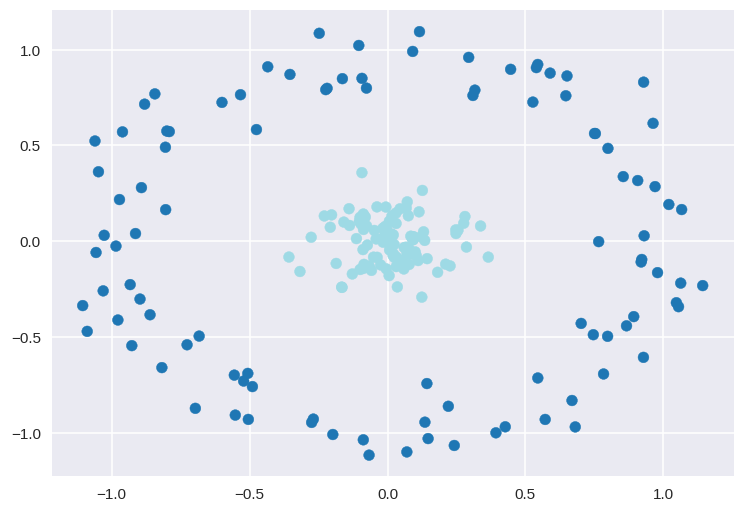

In [8]:
from sklearn.datasets import make_circles
from sklearn import svm
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.style.use("seaborn")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)

plt.show()

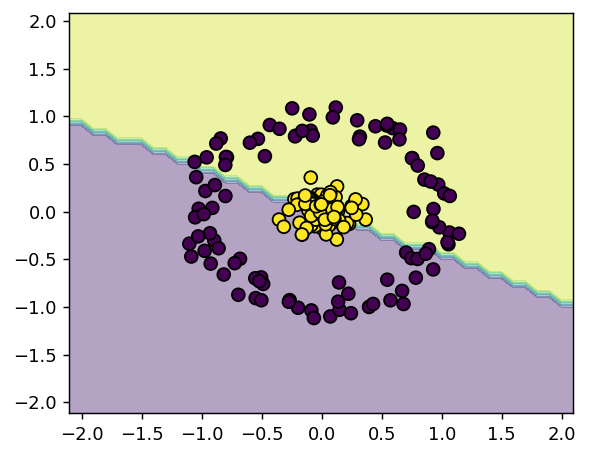

In [9]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

However, if we artificially add another dimention to the dataset of the form:

$z = x^2 + y^2$
we can clearly see a hyperplane that can distinguish both the datasets:

In [10]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [11]:
X_new = np.hstack((X, Z))

In [12]:
import plotly.graph_objects as go


In [13]:
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

That simple trick has helped us to get another dimension in which the data is linearly separable by a hyperplane (in this case, a 2d plane)

---

Now let us use the rbf kernel and use an SVM Classifier.

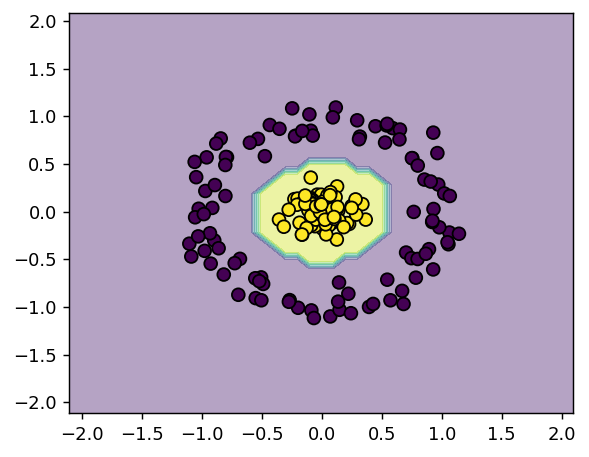

In [14]:
plt.style.use("default")
clf = svm.SVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

Now let us get back to our original dataset of iris and see if this kernel trick has helped us:

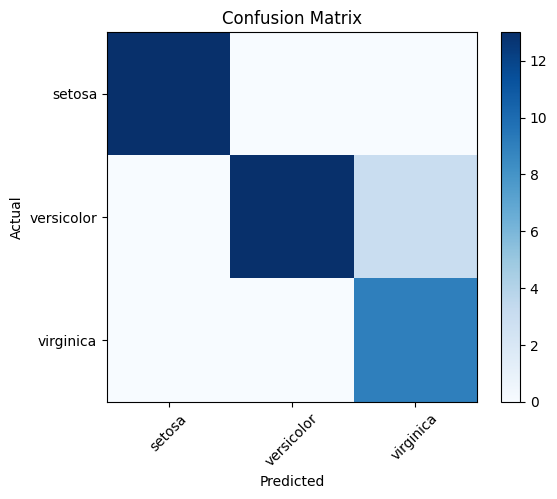

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
class_names = iris["target_names"]

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Certainly, using a kernel has increased our accuracy on the iris dataset.

Things to try out:
1. Try to run the same experiment after filtering different features, 2 at a time.

2. Using different kinds of kernels for the SVM among: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

3. Feature Impact: Experiment with different pairs of features in the iris dataset using both linear and rbf kernel SVMs. How does the decision boundary change? Compare accuracy and explain any observations.

4. Kernel Comparison: Test different kernels (e.g., 'poly', 'sigmoid') on the iris dataset. Compare their performance and decision boundaries with linear SVM. Which kernel seems most effective?

5. Non-Linear Transform: Apply a simple non-linear transformation (e.g., $z = x^2 + y^2$) to iris data. Visualize it and explain how this transformation helps. Assess SVM accuracy and changes in decision boundaries on this transformed data.

**Answer-1**

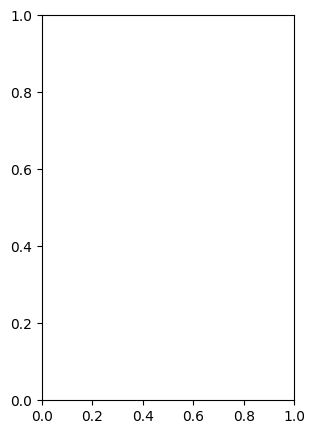

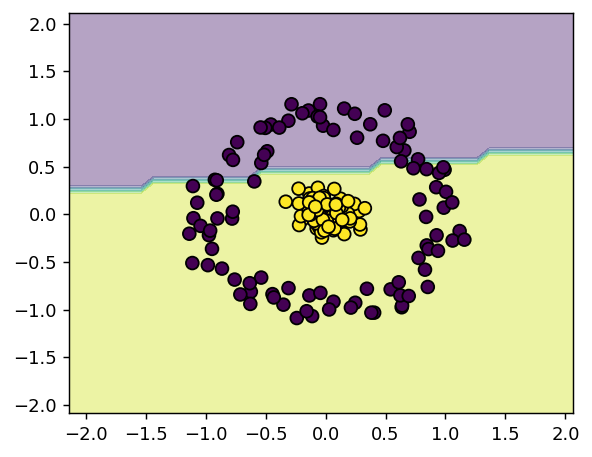

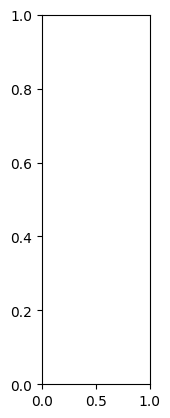

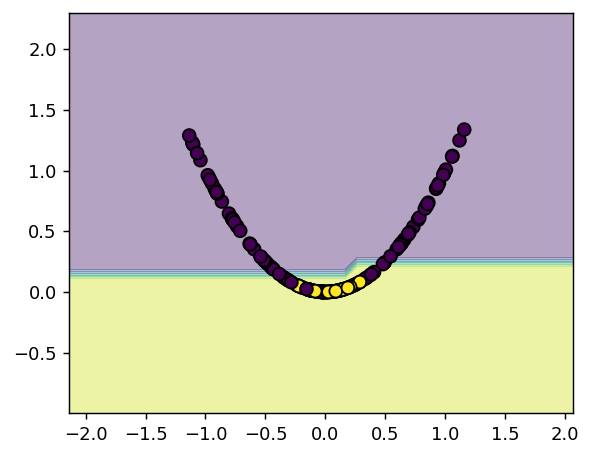

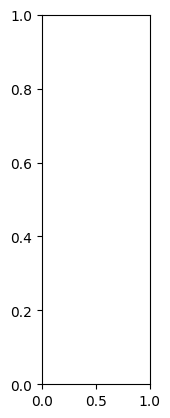

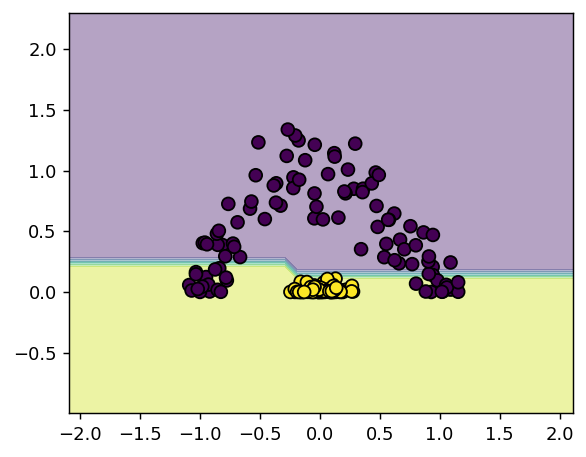

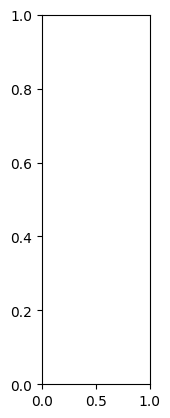

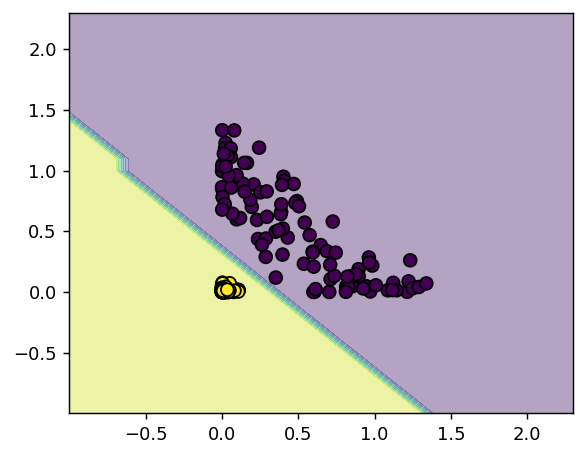

<Figure size 640x480 with 0 Axes>

In [26]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn import svm
import matplotlib.pyplot as plt

# Generate the dataset
X, y = make_circles(n_samples=200, factor=.1, noise=.1)

# Create additional features (e.g., by squaring the existing features)
X = np.column_stack((X, X[:, 0]**2, X[:, 1]**2))  # Adds squared features

# Create a list of feature pairs
feature_pairs = [(0, 1), (0, 2), (1, 2), (2, 3)]  # Pairs of features (indices)

# Set up the subplots
num_rows = 1  # Number of rows in the subplot grid
num_cols = len(feature_pairs)  # Number of columns in the subplot grid
plt.figure(figsize=(15, 5))

# Loop through different feature pairs
for i, pair in enumerate(feature_pairs):
    plt.style.use("default")

    # Create an SVM classifier
    clf = svm.SVC(kernel='linear')

    # Fit the classifier using the selected features
    clf.fit(X[:, pair], y)

    # Set up a subplot
    plt.subplot(num_rows, num_cols, i+1)

    # Plot the decision boundary for the current pair of features
    plotDecisionBoundary(X, y, pair, clf)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


**Answer-2 and 3**

In [27]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # We'll use only the first two features for visualization
y = iris.target


In [28]:
def plot_decision_boundary(X, y, clf, kernel, title):
    h = .02  # Step size in meshgrid

    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict class for each point in meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(f'Decision Boundary ({kernel} kernel)')
    plt.show()

def calculate_accuracy(X, y, clf):
    y_pred = clf.predict(X)
    accuracy = np.sum(y_pred == y) / len(y)
    return accuracy


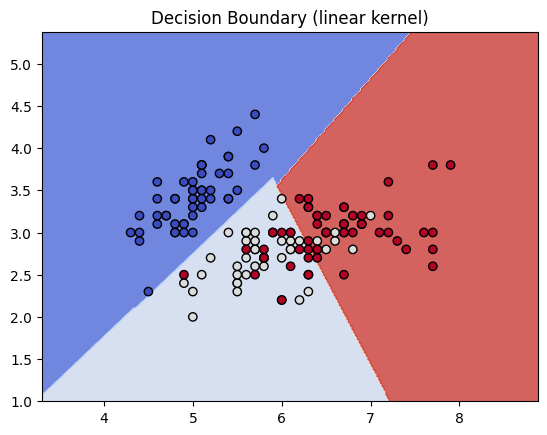

Accuracy (Linear Kernel): 0.82


In [29]:
from sklearn.svm import SVC

# Train SVM with linear kernel
linear_clf = SVC(kernel='linear')
linear_clf.fit(X, y)

# Plot decision boundary
plot_decision_boundary(X, y, linear_clf, 'linear', 'Linear')
linear_accuracy = calculate_accuracy(X, y, linear_clf)
print(f'Accuracy (Linear Kernel): {linear_accuracy}')


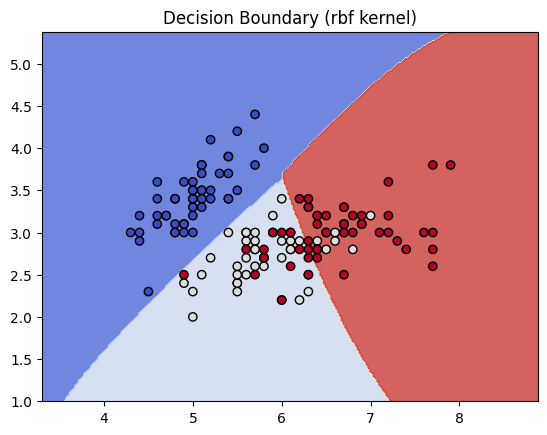

Accuracy (RBF Kernel): 0.82


In [30]:
# Train SVM with RBF kernel
rbf_clf = SVC(kernel='rbf')
rbf_clf.fit(X, y)

# Plot decision boundary
plot_decision_boundary(X, y, rbf_clf, 'rbf', 'RBF')
rbf_accuracy = calculate_accuracy(X, y, rbf_clf)
print(f'Accuracy (RBF Kernel): {rbf_accuracy}')


**ANSWER-4**

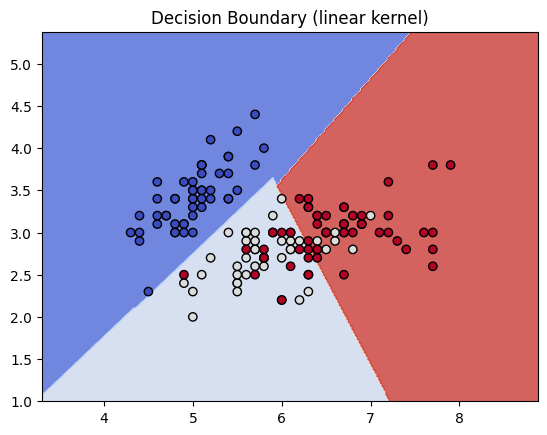

Accuracy (Linear Kernel): 0.82


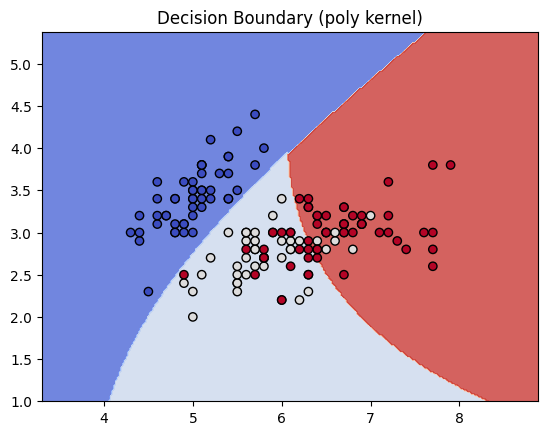

Accuracy (Poly Kernel): 0.8133333333333334


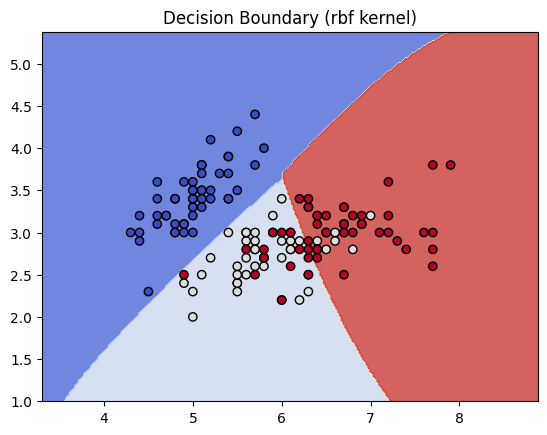

Accuracy (Rbf Kernel): 0.82


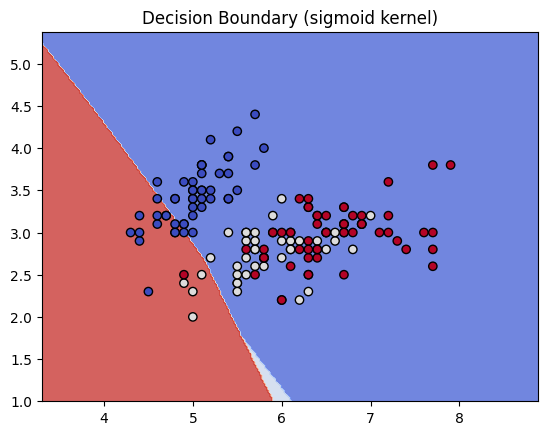

Accuracy (Sigmoid Kernel): 0.24666666666666667

Accuracy (Linear Kernel): 0.82


In [31]:
from sklearn.svm import SVC

# Define list of kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    # Train SVM with specified kernel
    clf = SVC(kernel=kernel)
    clf.fit(X, y)

    # Plot decision boundary
    plot_decision_boundary(X, y, clf, kernel, kernel.capitalize())

    # Calculate accuracy
    accuracy = calculate_accuracy(X, y, clf)
    print(f'Accuracy ({kernel.capitalize()} Kernel): {accuracy}')

# Linear Kernel (for comparison)
linear_clf = SVC(kernel='linear')
linear_clf.fit(X, y)
linear_accuracy = calculate_accuracy(X, y, linear_clf)
print(f'\nAccuracy (Linear Kernel): {linear_accuracy}')


**Answer-5**

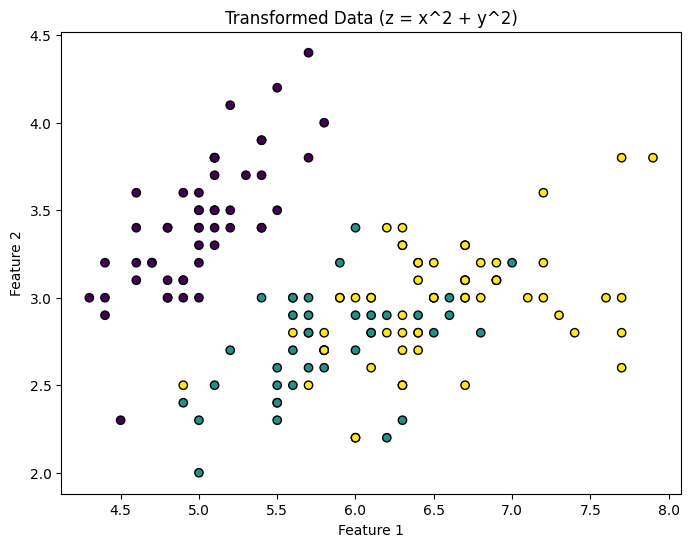

In [34]:
# Apply the non-linear transformation z = x^2 + y^2
X_transformed = np.column_stack((X, X[:, 0]**2 + X[:, 1]**2))

# Visualize the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Transformed Data (z = x^2 + y^2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


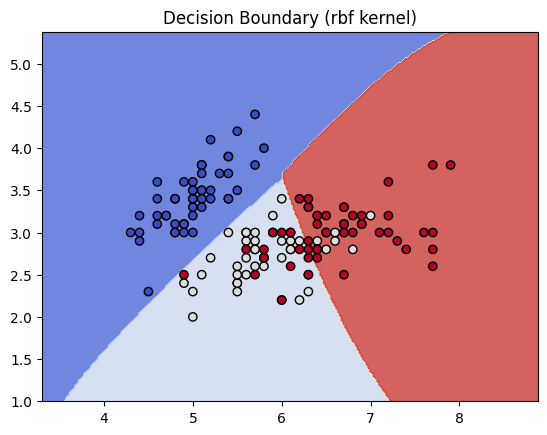

Accuracy (RBF Kernel, Original Data): 0.82


In [37]:
from sklearn.svm import SVC

# Train SVM with RBF kernel (implicitly applying non-linear transformation)
rbf_clf_transformed = SVC(kernel='rbf')
rbf_clf_transformed.fit(X, y)

# Plot decision boundary on the original data with RBF kernel
plot_decision_boundary(X, y, rbf_clf_transformed, 'rbf', 'RBF (Original Data)')

# Calculate accuracy on the original data with RBF kernel
accuracy_original_rbf = calculate_accuracy(X, y, rbf_clf_transformed)
print(f'Accuracy (RBF Kernel, Original Data): {accuracy_original_rbf}')


End of Lab 4

---

Helpful References and sources:

- https://datamites.com/blog/support-vector-machine-algorithm-svm-understanding-kernel-trick/
- https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
- https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
